# Analisis dan prediksi karyawan suatu perusahaan resign/attrition

## BY Kelompok 2:

- Ikbar Razan

- Richard

# Tujuan

Membuat model prediksi untuk memprediksi suatu karyawan resign atau tidak berdasarkan data yang diberikan. sehingga pihak perusahaan dapat fokus ke faktor tersebut dan mencegah sebelum suatu karyawan menunjukan tanda tanda resign/attrition

### Latar Belakang

### Analisis

- Mencari tau alasan di balik resignnya/attrition nya karyawan suatu perusahaan dan faktor-faktor yang mempengaruhi

- Melakukan perbandingan terhadap algoritma Logistic Regression, SVM, Decision Tree, XQBoost, dan CatBoost. Setelah itu mengetahui top 3 tertinggi berdasarkan scoring F1

- Menentukan metode terbaik diantara tanpa resampling dan oversampling pada kasus ini.

### Prediksi

Memperkirakan faktor apa yang harus diperhatikan kedepannya agar karyawan tidak resign ketika bekerja di suatu perusahaan

### Data set

link : https://www.kaggle.com/datasets/nezukokamaado/hr-metrics-and-analytics-repository

source : kaggle

Rata rata dari yang attrition dan yang menetap di perusahaan

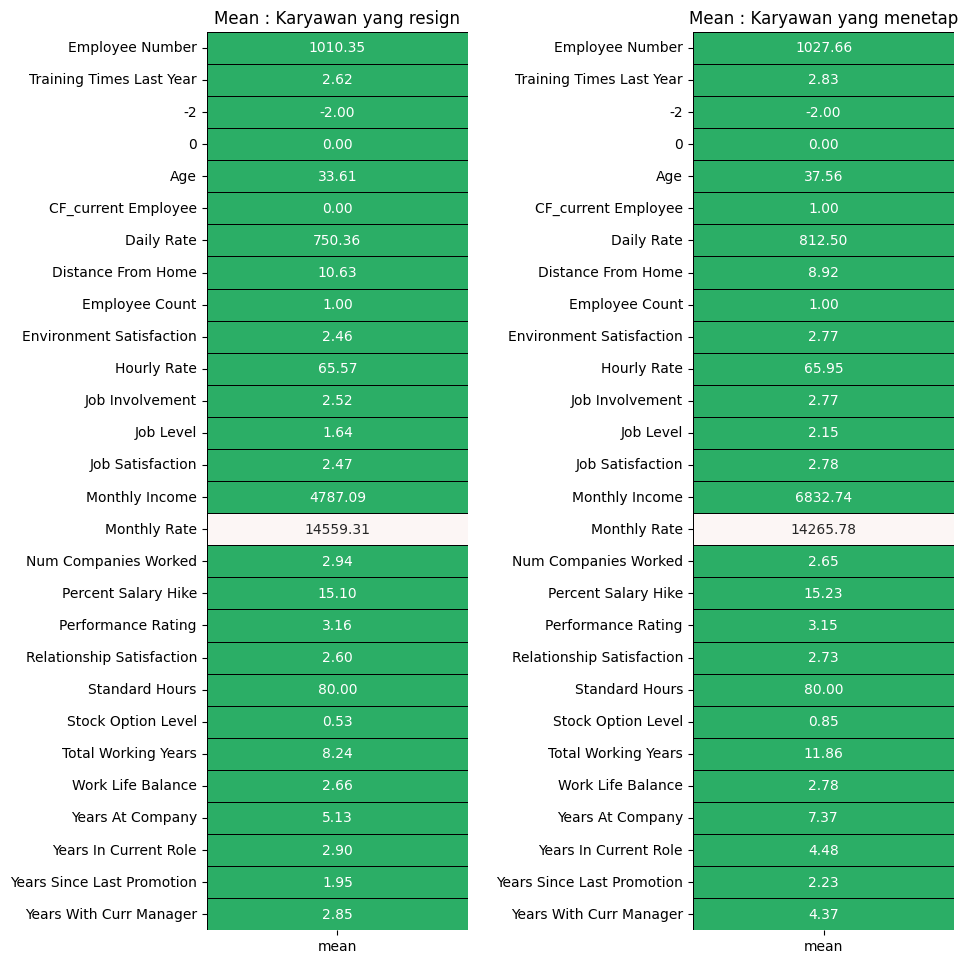

In [ ]:
yes = df[df['Attrition'] == 'Yes'].describe().T
no = df[df['Attrition'] == 'No'].describe().T

colors = ['#2BAE66','#FCF6F5']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,10))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean : Karyawan yang resign');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('Mean : Karyawan yang menetap');

fig.tight_layout(pad = 2)

Jika membandingkan dengan umur, secara rata rata yang menetap memiliki umur yang lebih tua dari pada umur karyawan yang resign

Mengetahui nama nama kolom dari data

In [ ]:
#kolom kategorikal
kolom_kategorikal = ['Attrition', 'CF_current Employee','Business Travel','Department', 'Education', 'Education Field', 'Employee Count','Employee Number',
                    'Environment Satisfaction', 'Gender', 'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction',
                    'Marital Status', 'Over18', 'Over Time', 'Performance Rating', 'Relationship Satisfaction', 'Stock Option Level',
                    'Work Life Balance','CF_age band','CF_attrition label', 'emp no']

#kolom numerikal
kolom_numerikal = ['-2', '0','Age', 'Daily Rate', 'Distance From Home', 'Hourly Rate', 'Monthly Income', 'Monthly Rate', 'Num Companies Worked',
                 'Percent Salary Hike', 'Standard Hours', 'Total Working Years', 'Training Times Last Year', 'Years At Company',
                 'Years In Current Role', 'Years Since Last Promotion', 'Years With Curr Manager']

# membuat data copt untuk eksperimental
df2 = df.copy(deep = True)



*   Membagi data ke kolom kategorikal dan numerikal,
*   Tipe data kategorikal : Object
*   Tipe data numerikal : Int64
*   Walau beberapa kolom kategorikal terlihat memiliki tipe data angka tetapi tetap masuk data kategorikal (ex : Job satisfaction, Job level, Environment Satisfaction, dll)
*   **Membuat data kopian sebagai bahan eksperimental dan tidak mempengaruhi data default**








## Data Cleaning dan Preproses data

### Label Encoding - Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd
from tqdm import tqdm

le = LabelEncoder()
print('Label Encoder Transformation')
text_categorical_features = []

for feature in tqdm(kolom_kategorikal):
    if isinstance(df2[feature][0], str):
        text_categorical_features.append(feature)
        # Transformasi fitur
        df2[feature] = le.fit_transform(df2[feature])
        # Mendapatkan mapping unique value ke encoded value
        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\n{feature} : {mapping}")


Label Encoder Transformation


100%|██████████| 24/24 [00:00<00:00, 412.62it/s]


Attrition : {'No': 0, 'Yes': 1}

Business Travel : {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

Department : {'HR': 0, 'R&D': 1, 'Sales': 2}

Education : {'Associates Degree': 0, "Bachelor's Degree": 1, 'Doctoral Degree': 2, 'High School': 3, "Master's Degree": 4}

Education Field : {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

Gender : {'Female': 0, 'Male': 1}

Job Role : {'Healthcare Representative': 0, 'Human Resources': 1, 'Laboratory Technician': 2, 'Manager': 3, 'Manufacturing Director': 4, 'Research Director': 5, 'Research Scientist': 6, 'Sales Executive': 7, 'Sales Representative': 8}

Marital Status : {'Divorced': 0, 'Married': 1, 'Single': 2}

Over18 : {'Y': 0}

Over Time : {'No': 0, 'Yes': 1}

CF_age band : {'25 - 34': 0, '35 - 44': 1, '45 - 54': 2, 'Over 55': 3, 'Under 25': 4}

CF_attrition label : {'Current Employees': 0, 'Ex-Employees': 1}

emp no : {'STAFF-1': 0, 'STAFF-10': 1, 'STAFF-100':

**Simpan ke dictionary agar bisa tau nilai asli dari data kategorikal yang sudah di label**

In [ ]:
tf1 = {}

for feature in kolom_kategorikal:
    if isinstance(df2[feature][0], str):
        df2[feature + '_encoded'] = le.fit_transform(df2[feature])
        # Langsung membangun dictionary pemetaan dari LabelEncoder
        tf1[feature] = {encoded: original for original, encoded in zip(le.classes_, le.transform(le.classes_))}

print(tf1)

{}


### Distribusi data Kategorikal + dropping

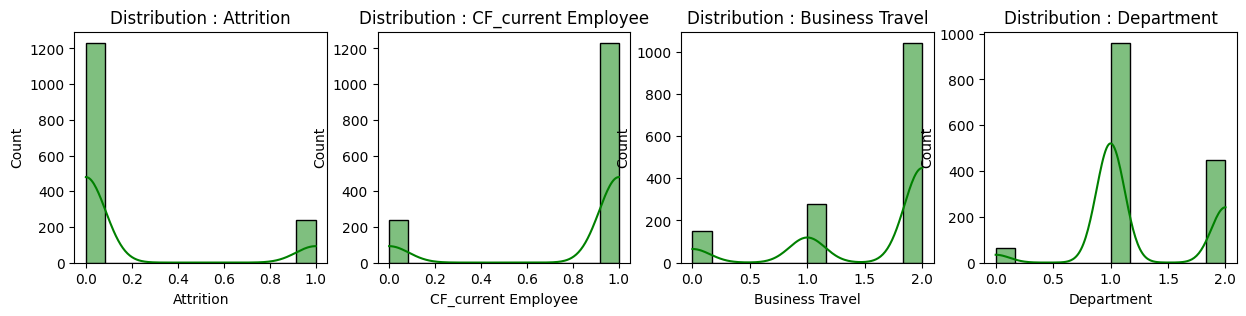

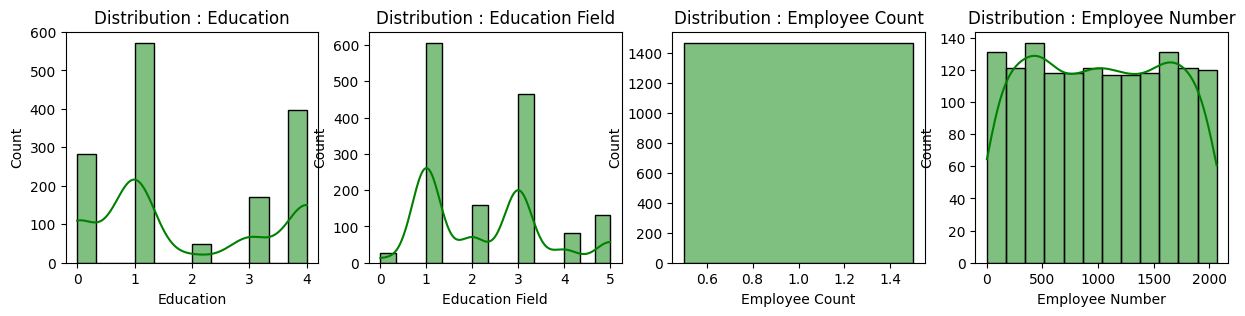

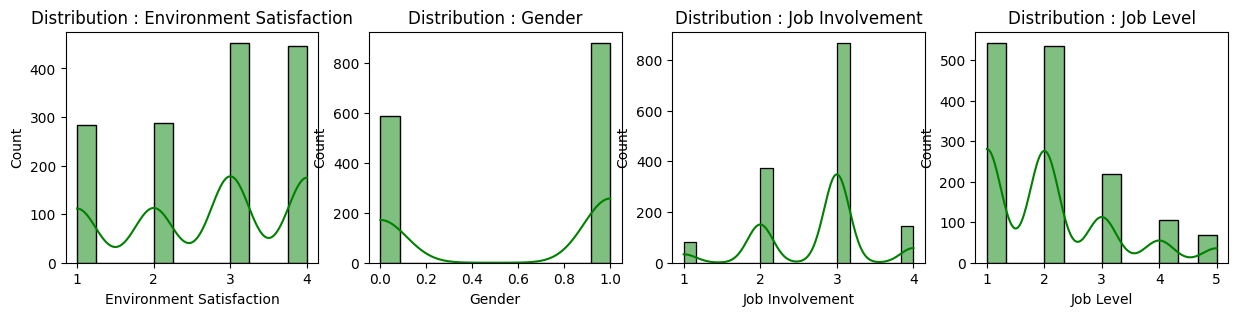

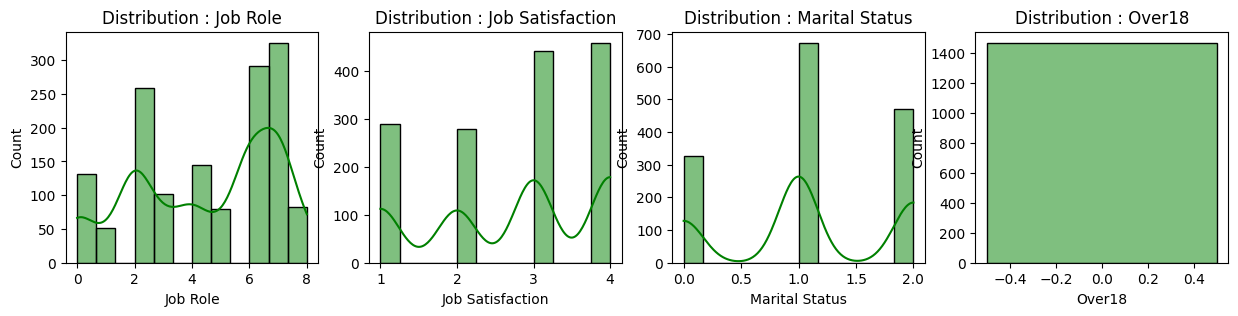

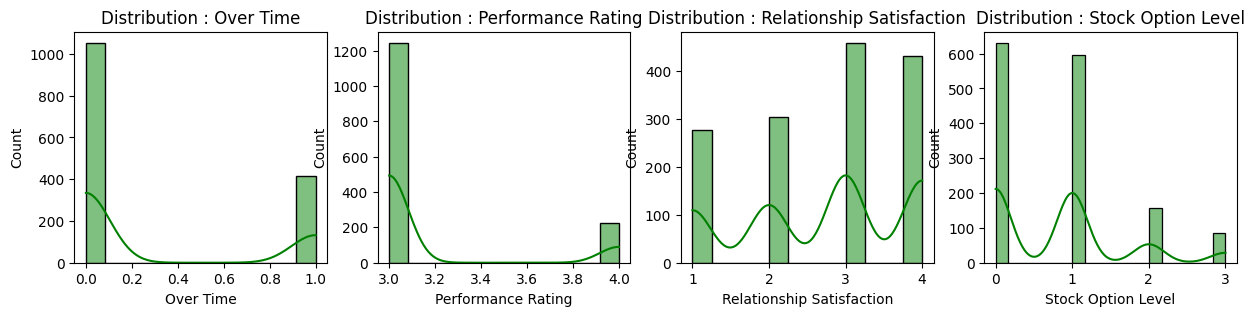

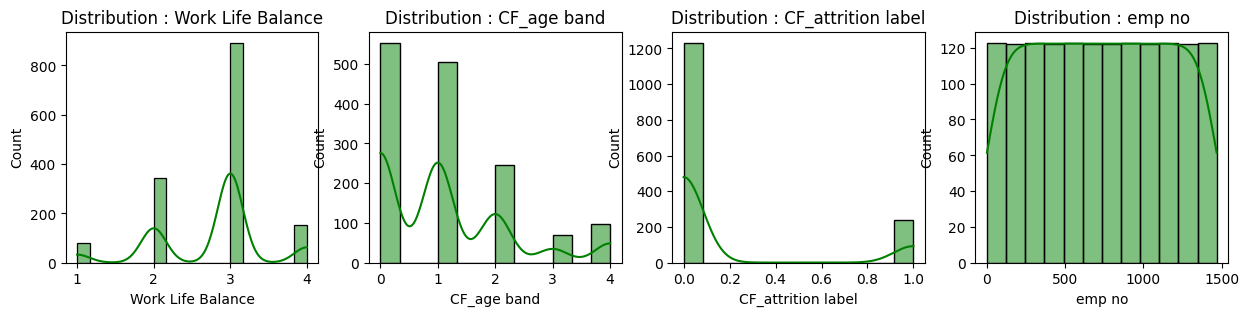

In [ ]:
for i in range(0, len(kolom_kategorikal), 4):
    fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 3))
    for idx, j in enumerate(kolom_kategorikal[i:i+4]):
        sns.histplot(df2[j], kde=True, color='green', ax=axs[idx], kde_kws={'bw_adjust': 1})
        axs[idx].set_title('Distribution : ' + j)

plt.show()



*   Employee number adalah id dari setiap karyawan yang dapat kita drop karena tidak berpengaruh ke model
*   Employee Count, Over18, dan emp no hanya memiliki satu data tunggal sehingga dapat di drop
*   CF_age band, CF_attrition label, dan CF_Current employee hanya label dari kolom attrition dan age yang memiliki nilai value sama sehingga dapat di drop
*   Kita juga memisahkan kolom attrition karena itu kolom target kita





In [ ]:
kolom_unused = ['Employee Number', 'Employee Count', 'Over18','emp no','CF_age band','CF_attrition label','CF_current Employee']
df2 = df2.drop(labels=kolom_unused, axis = 1)

#mengeluarkan dari kolom_kategorikal
kolom_kategorikal.remove('Employee Number')
kolom_kategorikal.remove('Employee Count')
kolom_kategorikal.remove('Over18')
kolom_kategorikal.remove('emp no')
kolom_kategorikal.remove('CF_age band')
kolom_kategorikal.remove('CF_attrition label')
kolom_kategorikal.remove('CF_current Employee')

#memisahkan dengan kolom target
kolom_kategorikal.remove('Attrition')

In [ ]:
df2.columns

Index(['Attrition', 'Business Travel', 'Department', 'Education Field',
       'Gender', 'Job Role', 'Marital Status', 'Over Time',
       'Training Times Last Year', '-2', '0', 'Age', 'Daily Rate',
       'Distance From Home', 'Education', 'Environment Satisfaction',
       'Hourly Rate', 'Job Involvement', 'Job Level', 'Job Satisfaction',
       'Monthly Income', 'Monthly Rate', 'Num Companies Worked',
       'Percent Salary Hike', 'Performance Rating',
       'Relationship Satisfaction', 'Standard Hours', 'Stock Option Level',
       'Total Working Years', 'Work Life Balance', 'Years At Company',
       'Years In Current Role', 'Years Since Last Promotion',
       'Years With Curr Manager'],
      dtype='object')

### Distribusi kolom numerikal + dropping


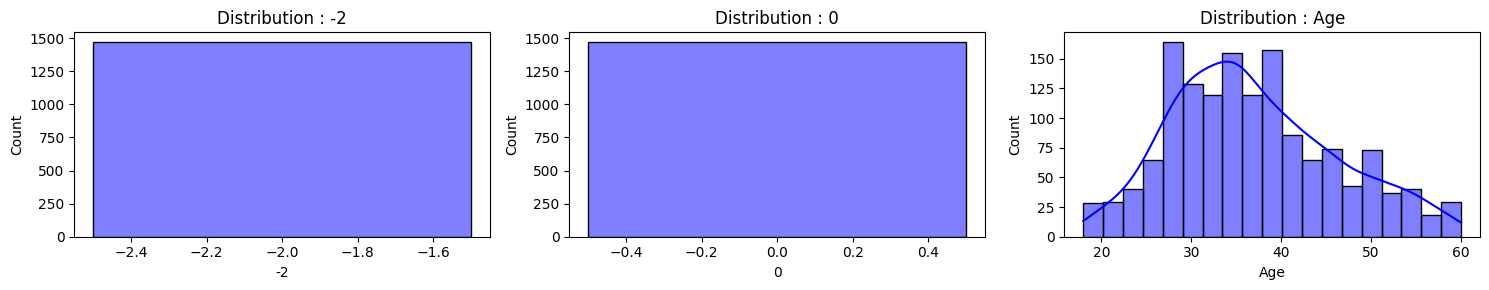

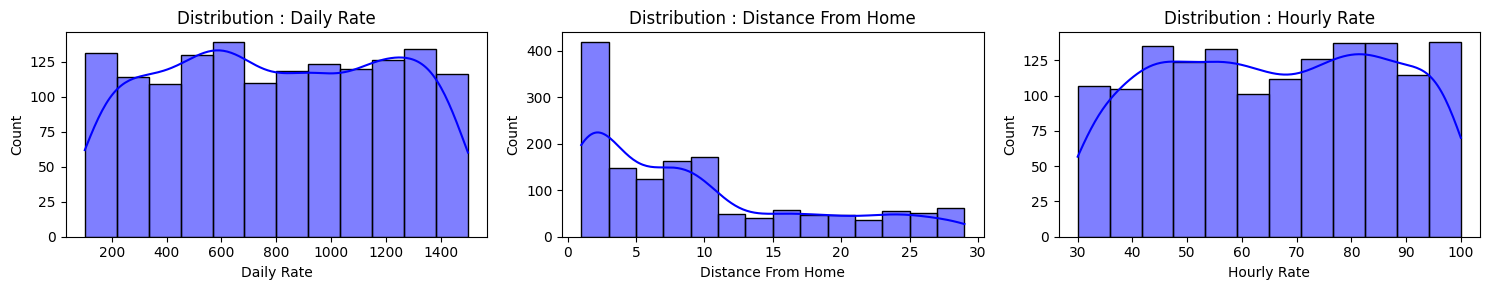

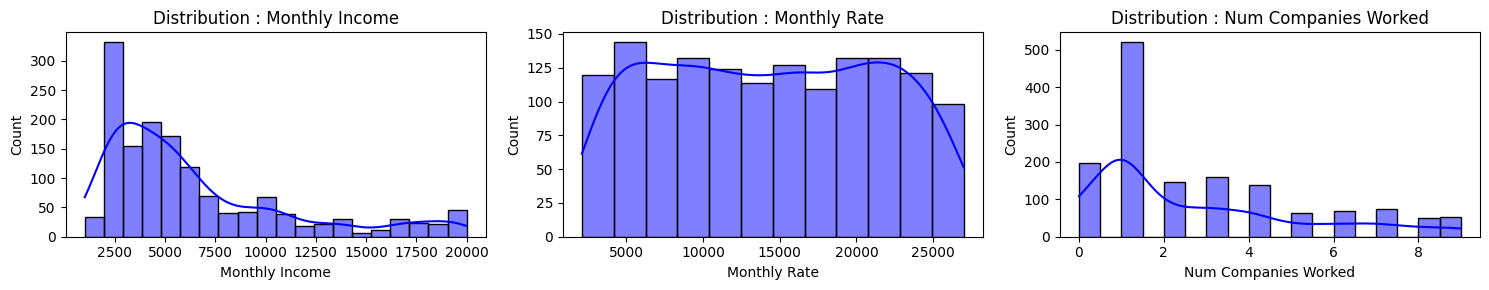

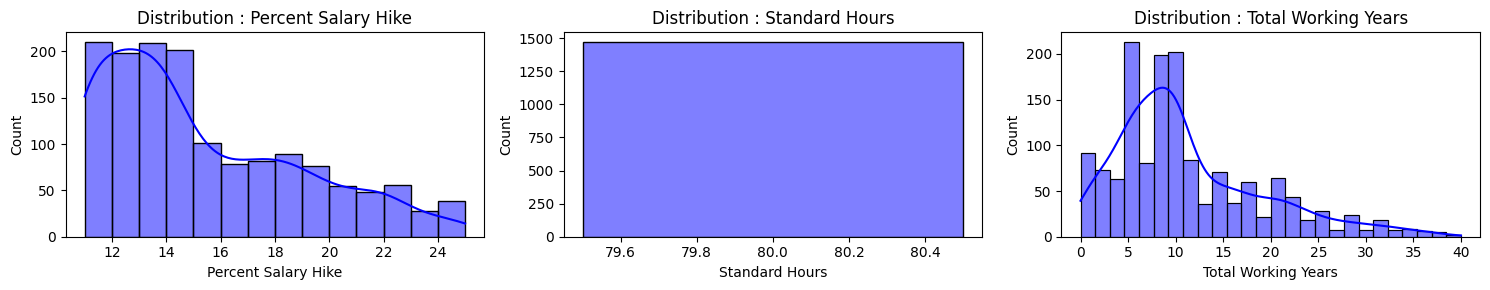

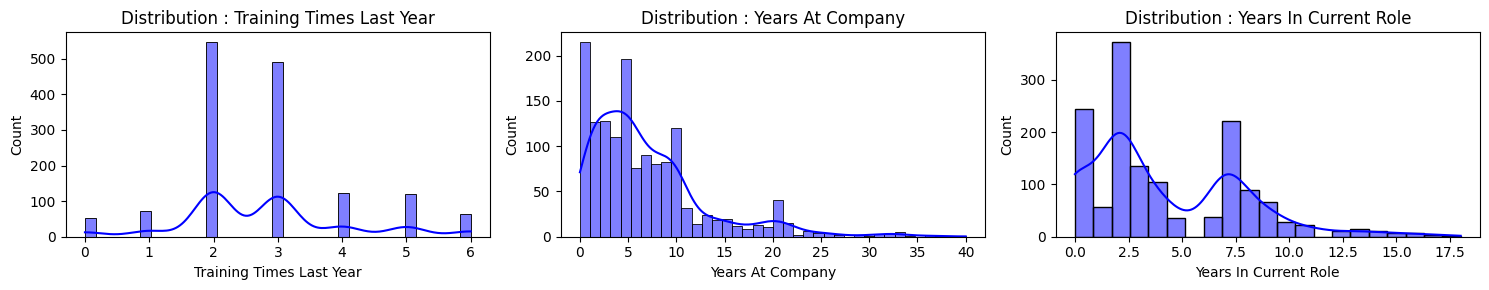

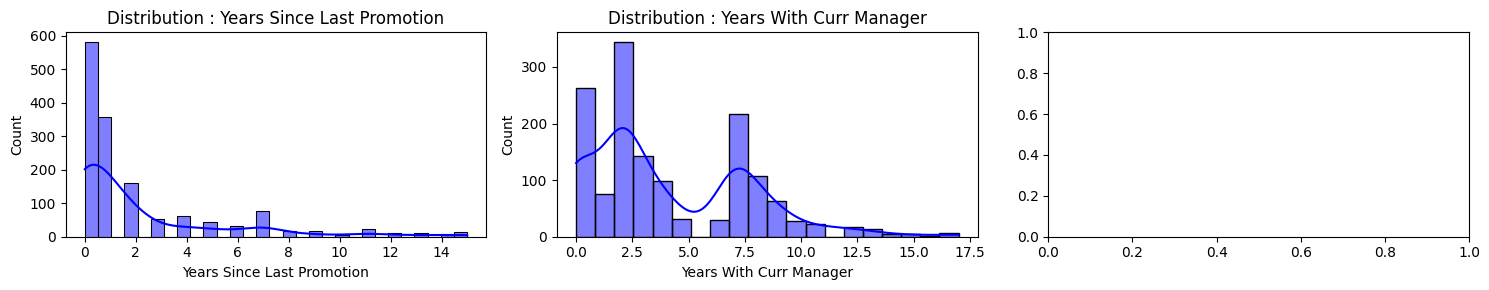

In [ ]:
for i in range(0, len(kolom_numerikal), 3):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 3))
    for idx, j in enumerate(kolom_numerikal[i:i+3]):
        if idx < len(axs):
            sns.histplot(df2[j], kde=True, color= 'blue', ax=axs[idx], kde_kws={'bw_adjust': 1})
            axs[idx].set_title('Distribution : ' + j)
    plt.tight_layout()
    plt.show()



*  Standard Hours, -2,, o memiliki hanya satu value saja sehingga tidak mempengaruhi modelling nanti dan dapat di drop.



In [ ]:
kolom_unused2 = ['Standard Hours','-2','0']
df2 = df2.drop(labels=kolom_unused2, axis = 1)

#mengeluarkan dari kolom__numerikal
kolom_numerikal.remove('Standard Hours')
kolom_numerikal.remove('-2')
kolom_numerikal.remove('0')

### Correlation terhadap Attrition - Categorical Features

kolom yang memiliki hanya data numerik

In [ ]:

#pengkondisian encoded_df sehingga bersisa kolom kategorikal dan kolom attrition
categorical_encoded_df = df2.drop(kolom_numerikal, axis = 1)
categorical_encoded_df.head()


,Attrition,Business Travel,Department,Education Field,Gender,Job Role,Marital Status,Over Time,Education,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Performance Rating,Relationship Satisfaction,Stock Option Level,Work Life Balance
0,1,2,2,1,0,7,2,1,0,2,3,2,4,3,1,0,1
1,0,1,1,1,1,6,1,0,3,3,2,2,2,4,4,1,3
2,1,2,1,4,1,2,2,1,0,4,2,1,3,3,2,0,3
3,0,1,1,1,0,6,1,1,4,4,3,1,3,3,3,0,3
4,0,2,1,3,1,2,1,0,3,1,3,1,2,3,4,1,3


Chi Squared Method

In [ ]:
X = categorical_encoded_df.drop('Attrition', axis = 1)
y = categorical_encoded_df['Attrition']

from sklearn.feature_selection import chi2, SelectKBest
chiSelector = SelectKBest(score_func=chi2, k=10).fit(X,y)

df_status = pd.DataFrame(chiSelector.get_support())
df_kolom_kategori = pd.DataFrame(X.columns)
df_skor = pd.DataFrame(chiSelector.scores_)

status_selected_categorical = pd.concat([df_kolom_kategori,df_status,df_skor], axis = 1)
status_selected_categorical.columns = ['Features','status','score_of_chi_squared']
status_selected_categorical.sort_values(by = 'score_of_chi_squared',ascending = False)
# categorical_encoded_df.shape

,Features,status,score_of_chi_squared
6,Over Time,True,63.845067
14,Stock Option Level,True,25.268826
10,Job Level,True,24.939242
5,Marital Status,True,18.745657
4,Job Role,True,9.004448
11,Job Satisfaction,True,7.011947
8,Environment Satisfaction,True,6.890594
9,Job Involvement,True,4.605616
13,Relationship Satisfaction,True,1.332333
1,Department,True,1.329297


Dengan melakukan algoritma Chi Square Method, kita dapat mengetahui skor hubungan antara kolom-kolom dengan kolom 'Attrition' sehingga kita mengetahui yang memiliki skor yang sangat tinggi ada kolom Over Time sehingga dapat disimpulkan karyawan yang resign sangat berhubungan erat dengan dia itu over time atau tidak

### Correlation terhadap Attrition - Numerical Features

mengetahui korelasi suatu kolom ke target Attrition, Jika nilai mendekati 0 maka semakin tidak memiliki korelasi kolom tersebut dengan kolom attrition

In [ ]:
kolom_korelasi = ['Attrition','Age', 'Daily Rate', 'Distance From Home', 'Hourly Rate', 'Monthly Income', 'Monthly Rate', 'Num Companies Worked', 'Percent Salary Hike', 'Total Working Years',
                  'Training Times Last Year', 'Years At Company', 'Years In Current Role', 'Years Since Last Promotion', 'Years With Curr Manager']
korelasi = df2[kolom_korelasi].copy()
korelasi.corr()['Attrition'].sort_values(ascending=False)

Attrition                     1.000000
Distance From Home            0.077924
Num Companies Worked          0.043494
Monthly Rate                  0.015170
Hourly Rate                  -0.006846
Percent Salary Hike          -0.013478
Years Since Last Promotion   -0.033019
Daily Rate                   -0.056652
Training Times Last Year     -0.059478
Years At Company             -0.134392
Years With Curr Manager      -0.156199
Age                          -0.159205
Monthly Income               -0.159840
Years In Current Role        -0.160545
Total Working Years          -0.171063
Name: Attrition, dtype: float64

dapat dilihat dari hasil output di atas bahwa secara perbandingan positif, kolom Distance from Home memiliki hubungan yang kuat dengan Attirition melainkan jika secara perbandingan negatif dengan skor hubungan tertinggi juga, kolom Total Working Years sangat berperan penting

<function matplotlib.pyplot.show(close=None, block=None)>

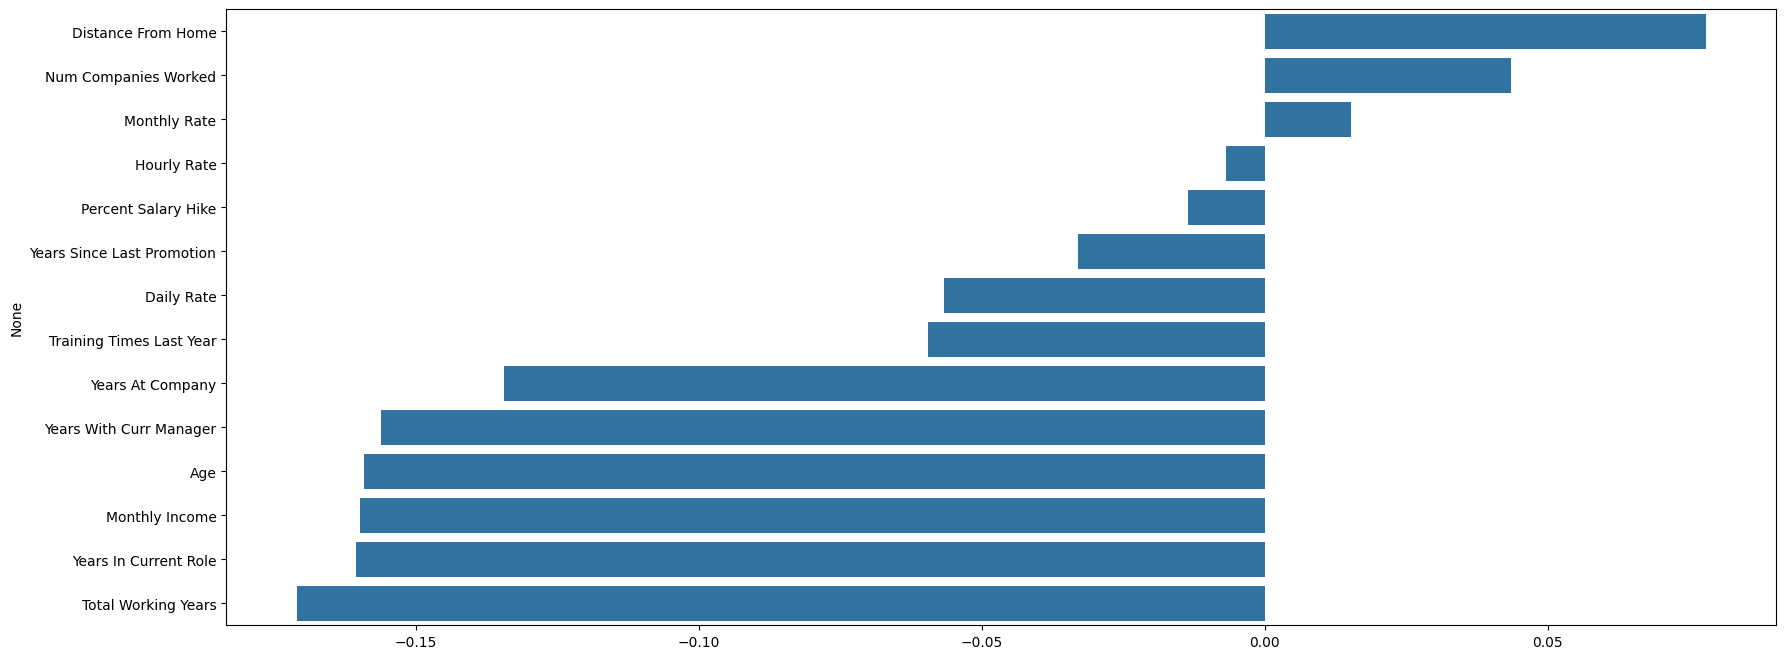

In [ ]:
data_baru = df2[kolom_korelasi].copy()
data_baru = data_baru.corr()['Attrition'].sort_values(ascending=False)[1:]
fig,ax = plt.subplots(1,figsize=(20,8))
sns.barplot(y=data_baru.index,x=data_baru.values,ax=ax)
plt.show

Menurut grafik korelasi, yang paling mempengaruhi suatu karyawan attrition atau tidak berdasarkan jarak dari rumah karyawan '(korelasi positif) dan Total tahun ia telah bekerja (korelasi negatif)

### Apa kondisi yang paling mempengaruhi karyawan Attrition?

In [ ]:
status_selected_categorical.sort_values(by = 'score_of_chi_squared',ascending = True)
print(kolom_kategorikal)

['Business Travel', 'Department', 'Education', 'Education Field', 'Environment Satisfaction', 'Gender', 'Job Involvement', 'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status', 'Over Time', 'Performance Rating', 'Relationship Satisfaction', 'Stock Option Level', 'Work Life Balance']


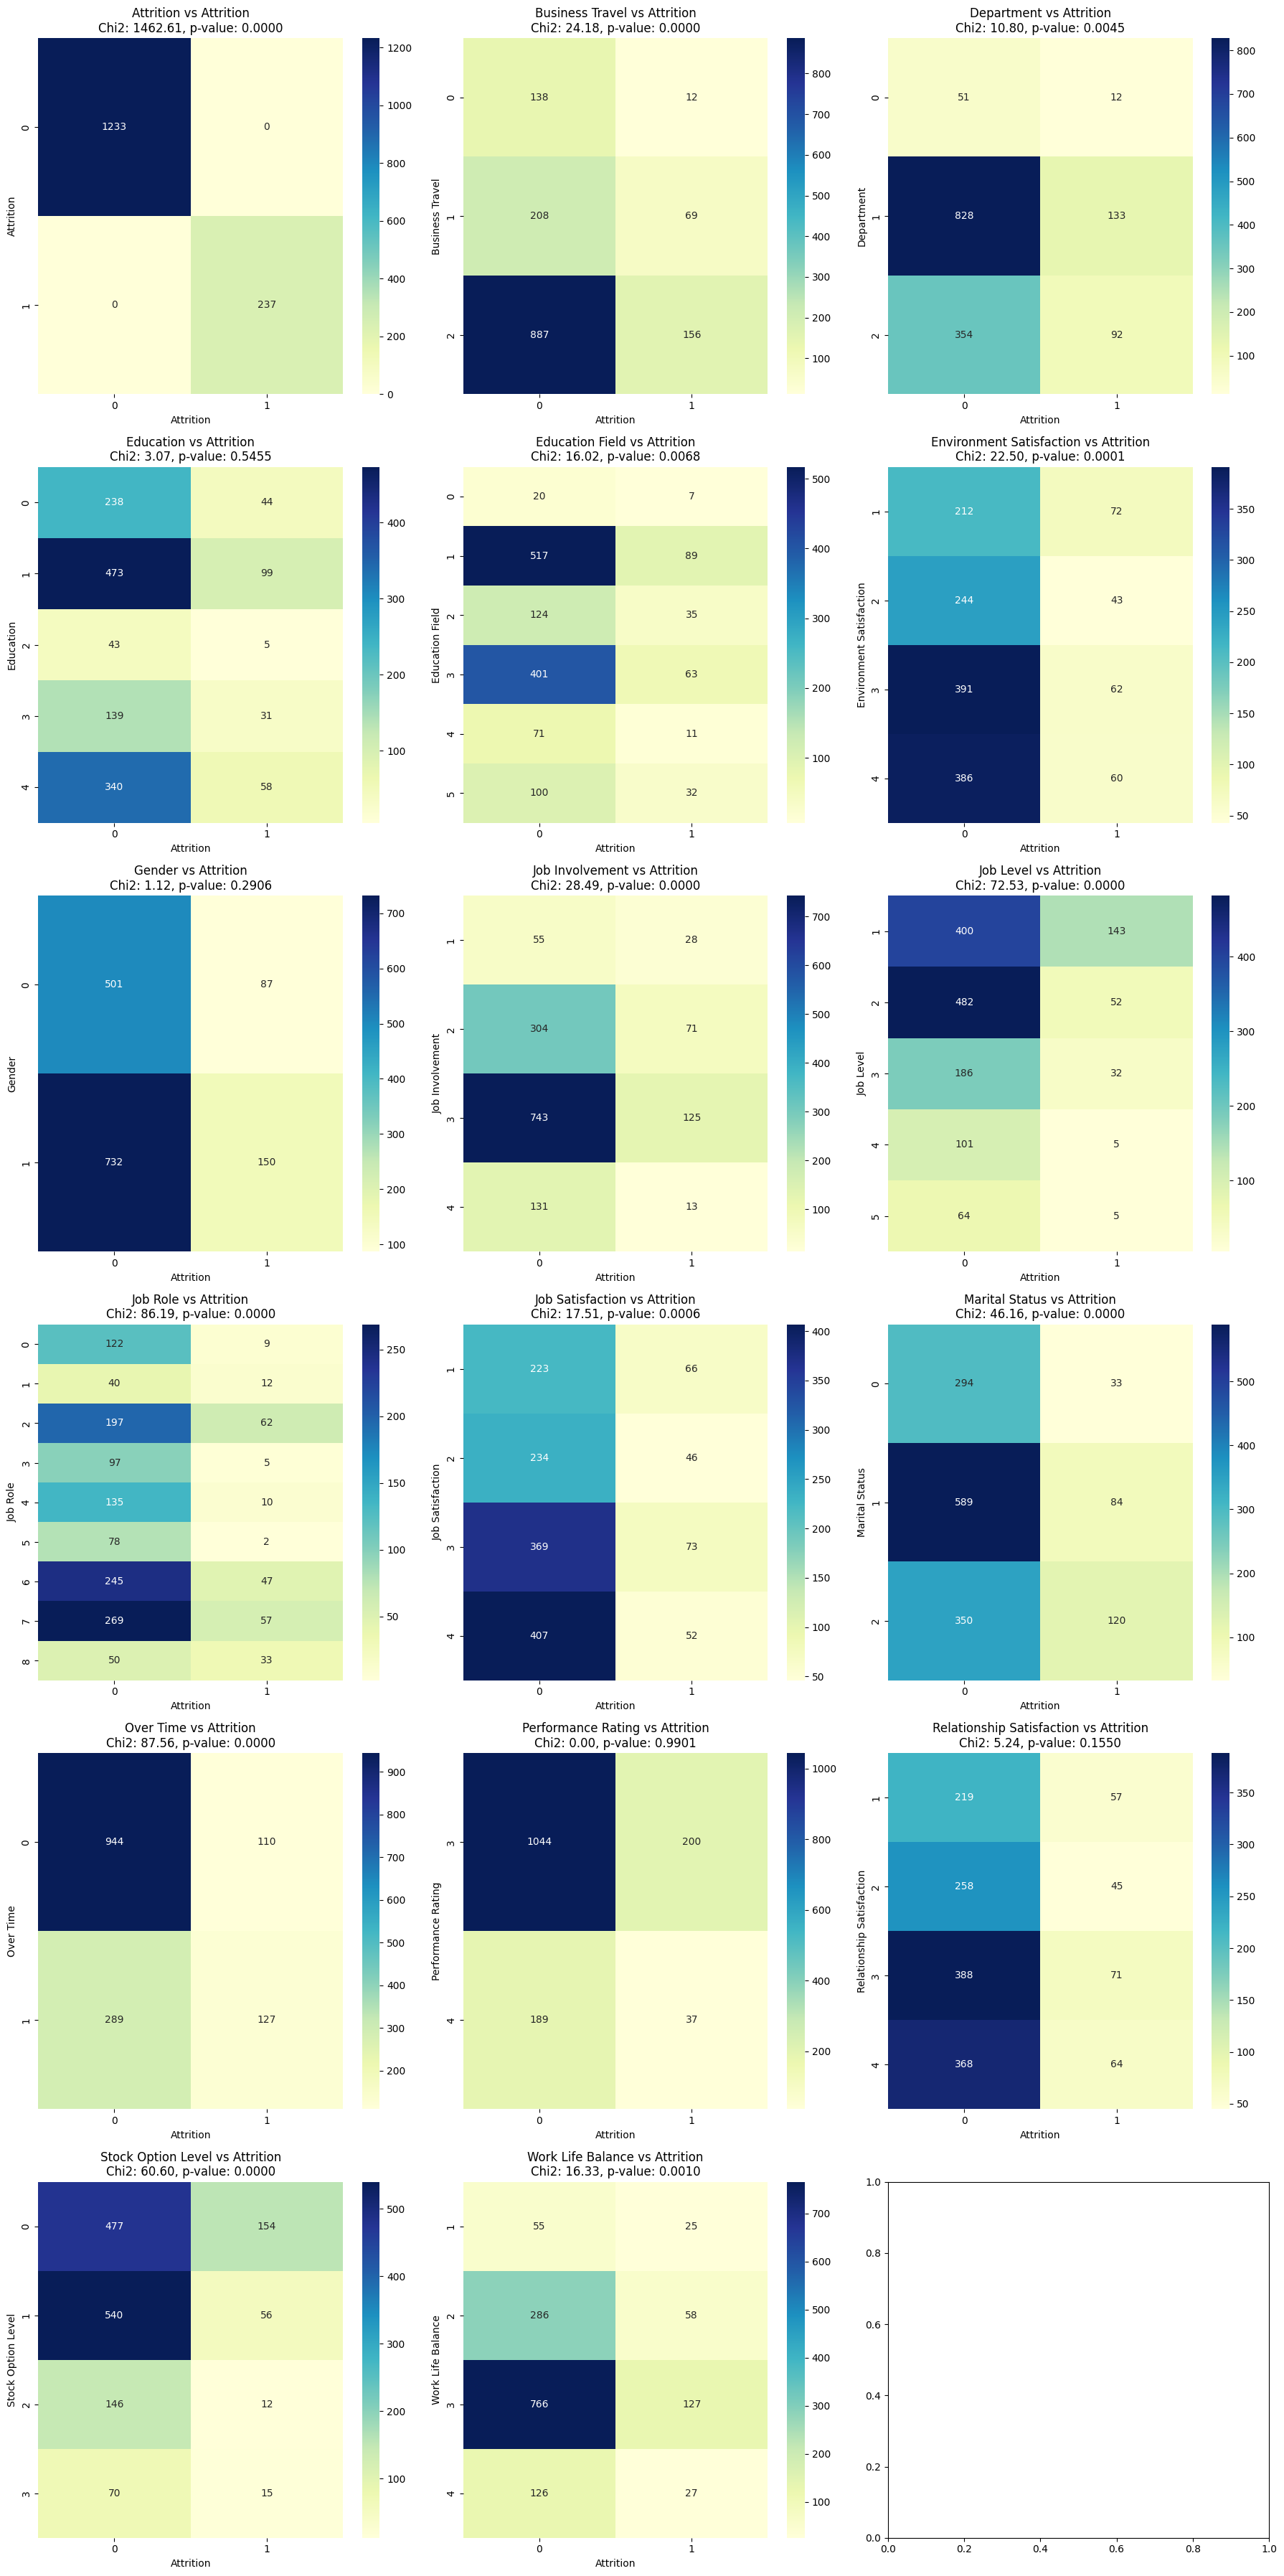

In [ ]:
from scipy.stats import chi2_contingency
def visualize_chi_square_with_target(df, target_column):
    kolom_bahan_chi = ['Attrition','Business Travel', 'Department', 'Education', 'Education Field', 'Environment Satisfaction', 'Gender', 'Job Involvement',
                           'Job Level', 'Job Role', 'Job Satisfaction', 'Marital Status', 'Over Time', 'Performance Rating', 'Relationship Satisfaction', 'Stock Option Level', 'Work Life Balance']
    num_plots = len(kolom_bahan_chi)
    fig, axs = plt.subplots((num_plots + 3) // 3, 3, figsize=(18, 6 * ((num_plots + 3) // 3)))

    if axs.ndim == 1:
        axs = np.expand_dims(axs, axis=0)

    for i, col in enumerate(kolom_bahan_chi):

        contingency_table = pd.crosstab(df[col], df[target_column])

        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        ax = axs[i // 3, i % 3]
        sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", ax=ax)
        ax.set_title(f'{col} vs {target_column}\nChi2: {chi2:.2f}, p-value: {p_value:.4f}')

    plt.tight_layout()
    plt.show()

visualize_chi_square_with_target(df2, 'Attrition')

Over Time dan Job role memiliki pengaruh sangat besar terhadap karyawan mengalami Attrition

In [ ]:
df2.shape

(1470, 31)

## Modeling default tanpa preproses

Menggunakan F1-Score sebagai metric evaluation

### Split Train Test Data + Label encoding

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(exclude=['object']).columns

le = LabelEncoder()
print('Label Encoder Transformation')
text_categorical_features = []

for feature in tqdm(categorical_cols):
    if isinstance(df[feature][0], str):
        text_categorical_features.append(feature)

        df[feature] = le.fit_transform(df[feature])

        mapping = dict(zip(le.classes_, le.transform(le.classes_)))
        print(f"\n{feature} : {mapping}")

df.head()

Label Encoder Transformation


100%|██████████| 13/13 [00:00<00:00, 340.63it/s]


Attrition : {'No': 0, 'Yes': 1}

Business Travel : {'Non-Travel': 0, 'Travel_Frequently': 1, 'Travel_Rarely': 2}

CF_age band : {'25 - 34': 0, '35 - 44': 1, '45 - 54': 2, 'Over 55': 3, 'Under 25': 4}

CF_attrition label : {'Current Employees': 0, 'Ex-Employees': 1}

Department : {'HR': 0, 'R&D': 1, 'Sales': 2}

Education Field : {'Human Resources': 0, 'Life Sciences': 1, 'Marketing': 2, 'Medical': 3, 'Other': 4, 'Technical Degree': 5}

emp no : {'STAFF-1': 0, 'STAFF-10': 1, 'STAFF-100': 2, 'STAFF-1001': 3, 'STAFF-1002': 4, 'STAFF-1003': 5, 'STAFF-1004': 6, 'STAFF-1005': 7, 'STAFF-1006': 8, 'STAFF-1007': 9, 'STAFF-1009': 10, 'STAFF-101': 11, 'STAFF-1010': 12, 'STAFF-1011': 13, 'STAFF-1012': 14, 'STAFF-1013': 15, 'STAFF-1014': 16, 'STAFF-1015': 17, 'STAFF-1016': 18, 'STAFF-1017': 19, 'STAFF-1018': 20, 'STAFF-1019': 21, 'STAFF-102': 22, 'STAFF-1022': 23, 'STAFF-1024': 24, 'STAFF-1025': 25, 'STAFF-1026': 26, 'STAFF-1027': 27, 'STAFF-1028': 28, 'STAFF-1029': 29, 'STAFF-103': 30, 'STAFF-103

,Attrition,Business Travel,CF_age band,CF_attrition label,Department,Education Field,emp no,Employee Number,Gender,Job Role,...,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,1,2,1,1,2,1,0,1,0,7,...,3,1,80,0,8,1,6,4,0,5
1,0,1,2,0,1,1,786,2,1,6,...,4,4,80,1,10,3,10,7,1,7
2,1,2,1,1,1,4,997,4,1,2,...,3,2,80,0,7,3,0,0,0,0
3,0,1,0,0,1,1,1088,5,0,6,...,3,3,80,0,8,3,8,7,3,0
4,0,2,0,0,1,3,1240,7,1,2,...,3,4,80,1,6,3,2,2,2,2


In [ ]:
#drop kolom yang memiliki nilai sama dengan attrition
df.drop(['CF_age band','CF_attrition label','CF_current Employee','emp no','Over18','-2','0'], inplace = True, axis = 1)

In [ ]:
# split data menjadi data train dan data test
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
print(train_df.shape, test_df.shape)

(1176, 34) (294, 34)


In [ ]:
Train_x = train_df.drop(['Attrition'], axis = 1)
Train_y= train_df['Attrition']

Test_x = test_df.drop(['Attrition'], axis = 1)
Test_y= test_df['Attrition']

### Modeling default dengan beberapa algortima Machine Learning

#### Xgboost

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
from xgboost import XGBClassifier

xgb_coba = XGBClassifier(n_jobs=-1, random_state=42)
xgb_coba.fit(Train_x, Train_y)

y_pred_base_xgb = xgb_coba.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred_base_xgb))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred_base_xgb))


Confusion Matrix:
[[243  10]
 [ 29  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.96      0.93       253
           1       0.55      0.29      0.38        41

    accuracy                           0.87       294
   macro avg       0.72      0.63      0.65       294
weighted avg       0.84      0.87      0.85       294



#### Logistic Regression

In [ ]:
log_coba = LogisticRegression()

# Melatih model dengan data training
log_coba.fit(Train_x, Train_y)
y_pred_log = log_coba.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred_log))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred_log))

Confusion Matrix:
[[253   0]
 [ 41   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       253
           1       0.00      0.00      0.00        41

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.74      0.86      0.80       294



#### Catboost

In [ ]:
# Membuat instance model CatBoostClassifier
model_cat = CatBoostClassifier()

# Melatih model
model_cat.fit(Train_x, Train_y)

# Membuat prediksi
predictions = model_cat.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, predictions))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, predictions))

#### LGBM Classifier

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 196, number of negative: 980
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1389
[LightGBM] [Info] Number of data points in the train set: 1176, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166667 -> initscore=-1.609438
[LightGBM] [Info] Start training from score -1.609438
Confusion Matrix:
[[249   4]
 [ 30  11]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.94       253
           1       0.73      0.27      0.39        41

    accuracy                           0.88       294
   macro avg       0.81      0.63      0.66       294
weighted avg       0.87      0

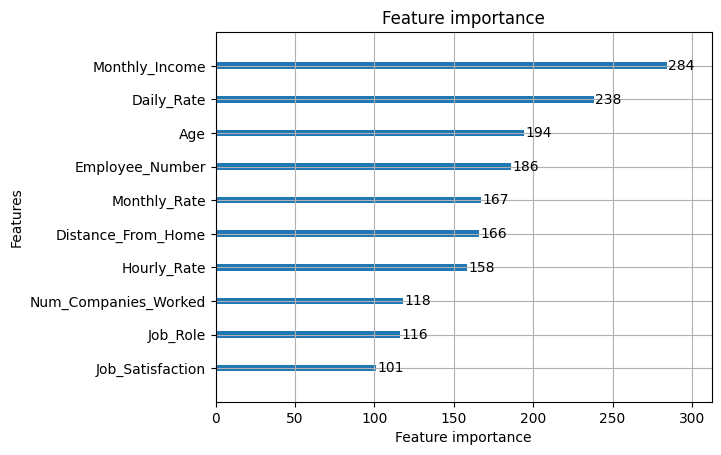

In [ ]:
import lightgbm as lgb
from lightgbm import LGBMClassifier

classifier_lgbm = LGBMClassifier(learning_rate= 0.01,max_depth = 3,n_estimators = 1000)

model = lgb.LGBMClassifier(
    num_leaves=31,
    learning_rate=0.05,
    n_estimators=100
)
model.fit(Train_x, Train_y)

# Prediksi pada test set
y_pred = model.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred))

# Menampilkan importance dari masing-masing fitur
lgb.plot_importance(model, max_num_features=10, importance_type='split')
plt.show()

#### Decision Tree

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
model_tree.fit(Train_x, Train_y)

# Melakukan prediksi pada test set
y_pred2 = model_tree.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred2))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred2))



Confusion Matrix:
[[244   9]
 [ 36   5]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.92       253
           1       0.36      0.12      0.18        41

    accuracy                           0.85       294
   macro avg       0.61      0.54      0.55       294
weighted avg       0.80      0.85      0.81       294



#### SVM

In [ ]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC(random_state=42, max_iter=10000)
model_svm.fit(Train_x, Train_y)

# Melakukan prediksi pada test set
y_pred_svm = model_svm.predict(Test_x)

# Menghitung dan menampilkan confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(Test_y, y_pred_svm))

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(Test_y, y_pred_svm))

Confusion Matrix:
[[253   0]
 [ 41   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       253
           1       0.00      0.00      0.00        41

    accuracy                           0.86       294
   macro avg       0.43      0.50      0.46       294
weighted avg       0.74      0.86      0.80       294



Dari hasil-hasil modeling diatas, dapat dilihat melalui F1-score bahwa hasil prediksian sangat imbalance antara 0 (No), dan 1(Yes)(dapat dilihat dari ConConfusion Matrix juga). Oleh karena itu diperlukan preprocessing lebih lanjut, seperti:
- Imbalance Handling
- Feature Scaling
- Feature Selection

## Advance Preprocessing Data

### Oversampling Kolom Attrition

In [ ]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

cols = list(df2.columns)
cols.remove('Attrition')

over = SMOTE(sampling_strategy = 0.85)
under = RandomUnderSampler(sampling_strategy = 0.1)
f1 = df2.loc[:,cols]
t1 = df2.loc[:,'Attrition']

steps = [('over', over)]
pipeline = Pipeline(steps=steps)
f1, t1 = pipeline.fit_resample(f1, t1)
Counter(t1)

Counter({1: 1048, 0: 1233})

Visualisasi data Attrition setelah Oversampling

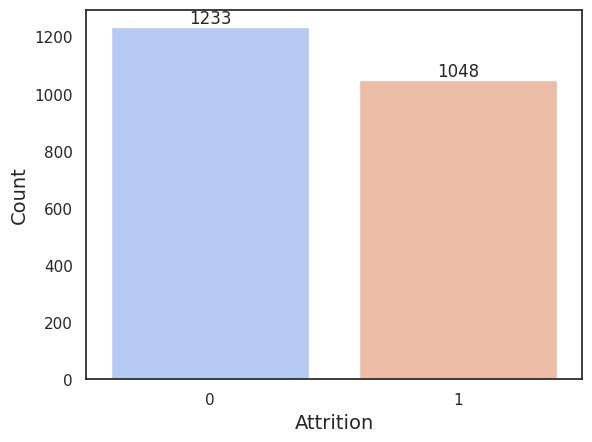

In [ ]:
value_counts = t1.value_counts()

ax = sns.barplot(x = value_counts.index, y=t1.value_counts(), palette='coolwarm')
ax.set_xlabel('Attrition',fontsize=14)
ax.set_ylabel('Count',fontsize=14)

for i, count in enumerate(value_counts):
  ax.text(i, count +0.1, str(count), ha= 'center', va='bottom')

plt.show()

In [ ]:
f1

,Business Travel,Department,Education Field,Gender,Job Role,Marital Status,Over Time,Training Times Last Year,Age,Daily Rate,...,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager
0,2,2,1,0,7,2,1,0,41,1102,...,11,3,1,0,8,1,6,4,0,5
1,1,1,1,1,6,1,0,3,49,279,...,23,4,4,1,10,3,10,7,1,7
2,2,1,4,1,2,2,1,3,37,1373,...,15,3,2,0,7,3,0,0,0,0
3,1,1,1,0,6,1,1,3,33,1392,...,11,3,3,0,8,3,8,7,3,0
4,2,1,3,1,2,1,0,3,27,591,...,12,3,4,1,6,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2276,1,2,1,0,8,1,0,3,32,517,...,14,3,3,0,3,3,1,0,0,0
2277,2,1,1,0,2,1,1,1,36,728,...,18,3,3,0,5,1,3,3,0,0
2278,1,1,3,0,6,1,0,2,25,860,...,14,3,1,0,7,3,7,6,0,6
2279,2,2,1,1,7,1,0,2,31,936,...,13,3,1,2,10,2,2,1,1,1


### Split Train Test Data

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(f1, t1, test_size = 0.15, random_state = 42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1960 to 860
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Business Travel             1938 non-null   int64
 1   Department                  1938 non-null   int64
 2   Education Field             1938 non-null   int64
 3   Gender                      1938 non-null   int64
 4   Job Role                    1938 non-null   int64
 5   Marital Status              1938 non-null   int64
 6   Over Time                   1938 non-null   int64
 7   Training Times Last Year    1938 non-null   int64
 8   Age                         1938 non-null   int64
 9   Daily Rate                  1938 non-null   int64
 10  Distance From Home          1938 non-null   int64
 11  Education                   1938 non-null   int64
 12  Environment Satisfaction    1938 non-null   int64
 13  Hourly Rate                 1938 non-null   int64
 14  Job In

In [ ]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1938 entries, 1960 to 860
Series name: Attrition
Non-Null Count  Dtype
--------------  -----
1938 non-null   int64
dtypes: int64(1)
memory usage: 30.3 KB


### Feature Selection Advanced - Kolom Kategorikal

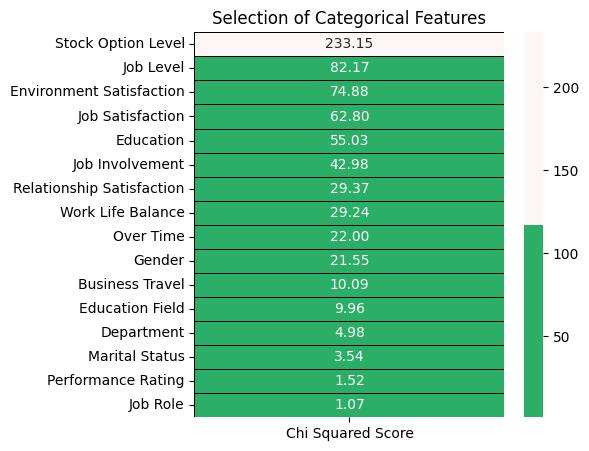

In [ ]:
features = x_train.loc[:,kolom_kategorikal]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = chi2,k = 'all')

fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['Chi Squared Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'Chi Squared Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Categorical Features');

Dari visualisasi menggunakan CHi Square Score, kita akan drop yang memiliki skor yang kecil seperti


*   Performance Rating
*   Department
*   Job Role
*   Marital Status
*   Education Field
*   Business Travel



### Feature Selection Advanced - Kolom Numerikal

ANOVA Test

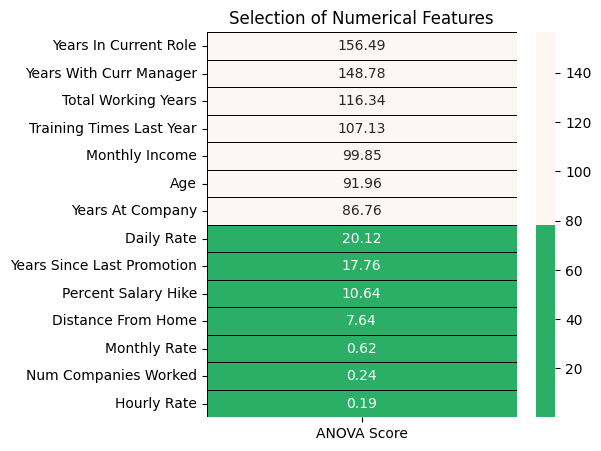

In [ ]:
from sklearn.feature_selection import f_classif

features = x_train.loc[:,kolom_numerikal]
target = pd.DataFrame(y_train)

best_features = SelectKBest(score_func = f_classif,k = 'all')
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score'])

plt.subplots(figsize = (5,5))
sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
plt.title('Selection of Numerical Features');

Daru visualisasi dari tes korelasi ANOVA, Kita dapat drop kolom yang memiliki skor cukup kecil seperti
*   Monthly Rate
*   Num Companies Worked
*   Hourly Rate
*   Percent Salary Hike
*   Daily Rate
*   Distance From Home
*   Years Since Last Promotiom







### Dropping column advanced

In [ ]:
x_train = x_train.drop(columns = ['Monthly Rate', 'Hourly Rate', 'Num Companies Worked', 'Percent Salary Hike',
                                  'Years Since Last Promotion', 'Distance From Home','Daily Rate',
                                  'Performance Rating', 'Department', 'Job Role', 'Education Field',
                                  'Business Travel', 'Marital Status' ])

x_test = x_test.drop(columns = ['Monthly Rate', 'Hourly Rate', 'Num Companies Worked', 'Percent Salary Hike',
                                  'Years Since Last Promotion', 'Distance From Home','Daily Rate',
                                  'Performance Rating', 'Department', 'Job Role', 'Education Field',
                                  'Business Travel', 'Marital Status' ])

x_train.shape

(1938, 17)

Visualisasi data train setelah scaling

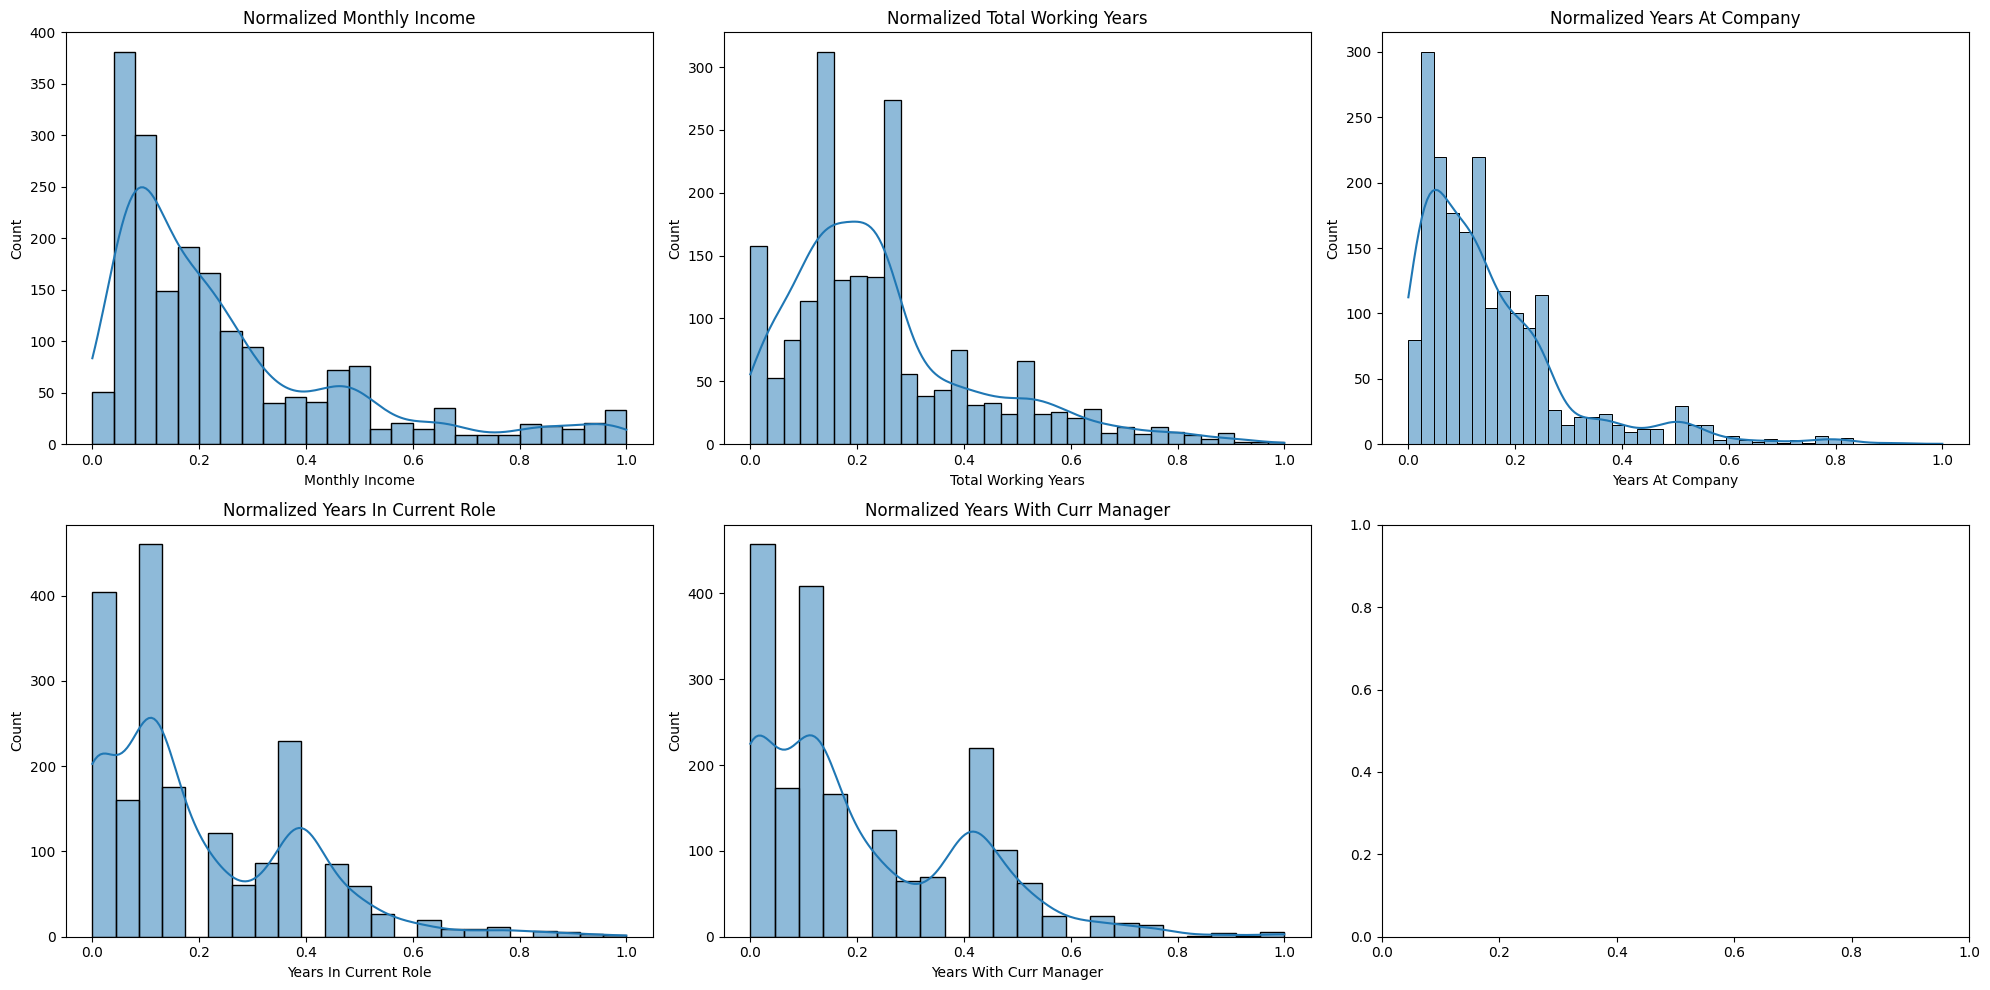

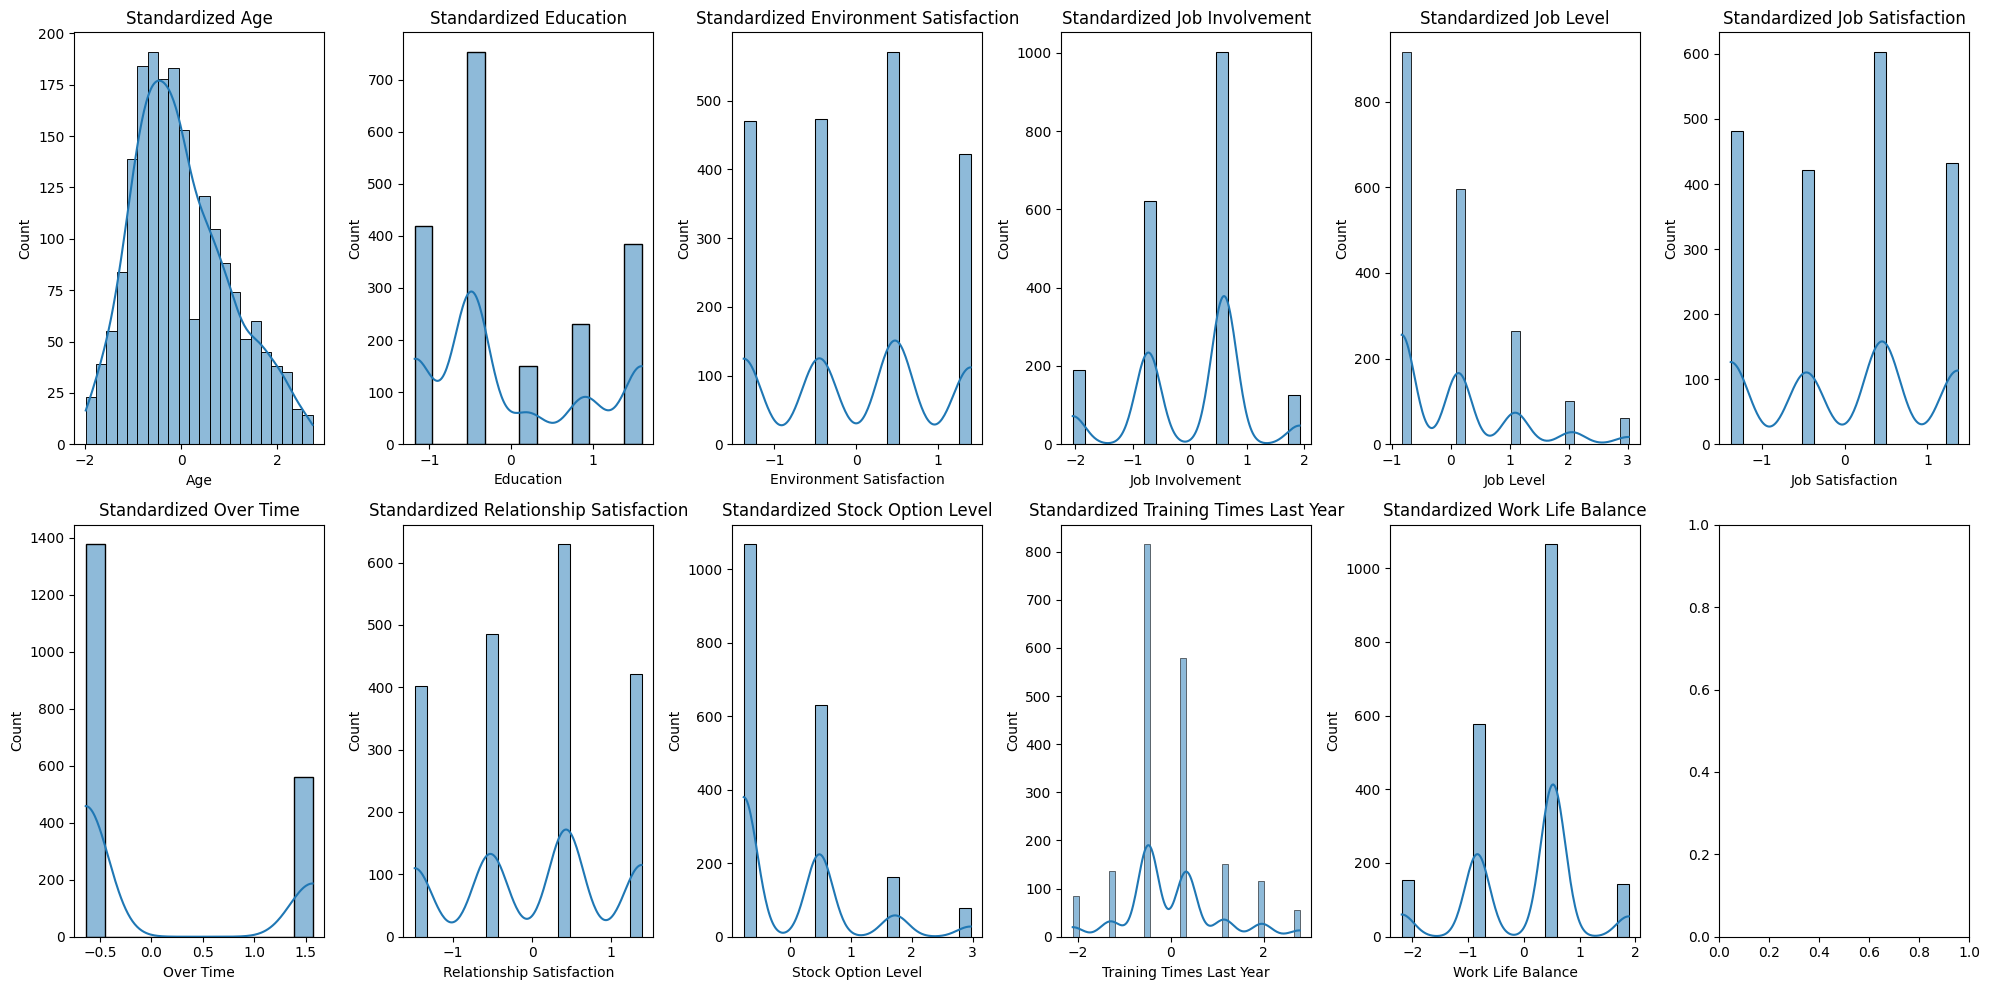

In [ ]:
# Deklarasi kolom-kolom yang akan di-scaling untuk normalisasi
cols_to_scale_normalize = ['Monthly Income', 'Total Working Years', 'Years At Company', 'Years In Current Role',
                           'Years With Curr Manager']

# Deklarasi kolom-kolom yang akan di-scaling untuk standarisasi
cols_to_scale_standardize = ['Age', 'Education', 'Environment Satisfaction', 'Job Involvement',
                             'Job Level', 'Job Satisfaction', 'Over Time', 'Relationship Satisfaction',
                             'Stock Option Level', 'Training Times Last Year', 'Work Life Balance']

# Visualisasi hasil normalisasi
fig, axs = plt.subplots(2, ceil(len(cols_to_scale_normalize)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale_normalize):
    row = i // ceil(len(cols_to_scale_normalize)/2)
    col_idx = i % ceil(len(cols_to_scale_normalize)/2)
    sns.histplot(x_train[col], kde=True, ax=axs[row, col_idx]).set_title(f'Normalized {col}')

plt.tight_layout()
plt.show()

# Visualisasi hasil standarisasi
fig, axs = plt.subplots(2, ceil(len(cols_to_scale_standardize)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale_standardize):
    row = i // ceil(len(cols_to_scale_standardize)/2)
    col_idx = i % ceil(len(cols_to_scale_standardize)/2)
    sns.histplot(x_train[col], kde=True, ax=axs[row, col_idx]).set_title(f'Standardized {col}')

plt.tight_layout()
plt.show()

Visualisasi data test setelah scaling

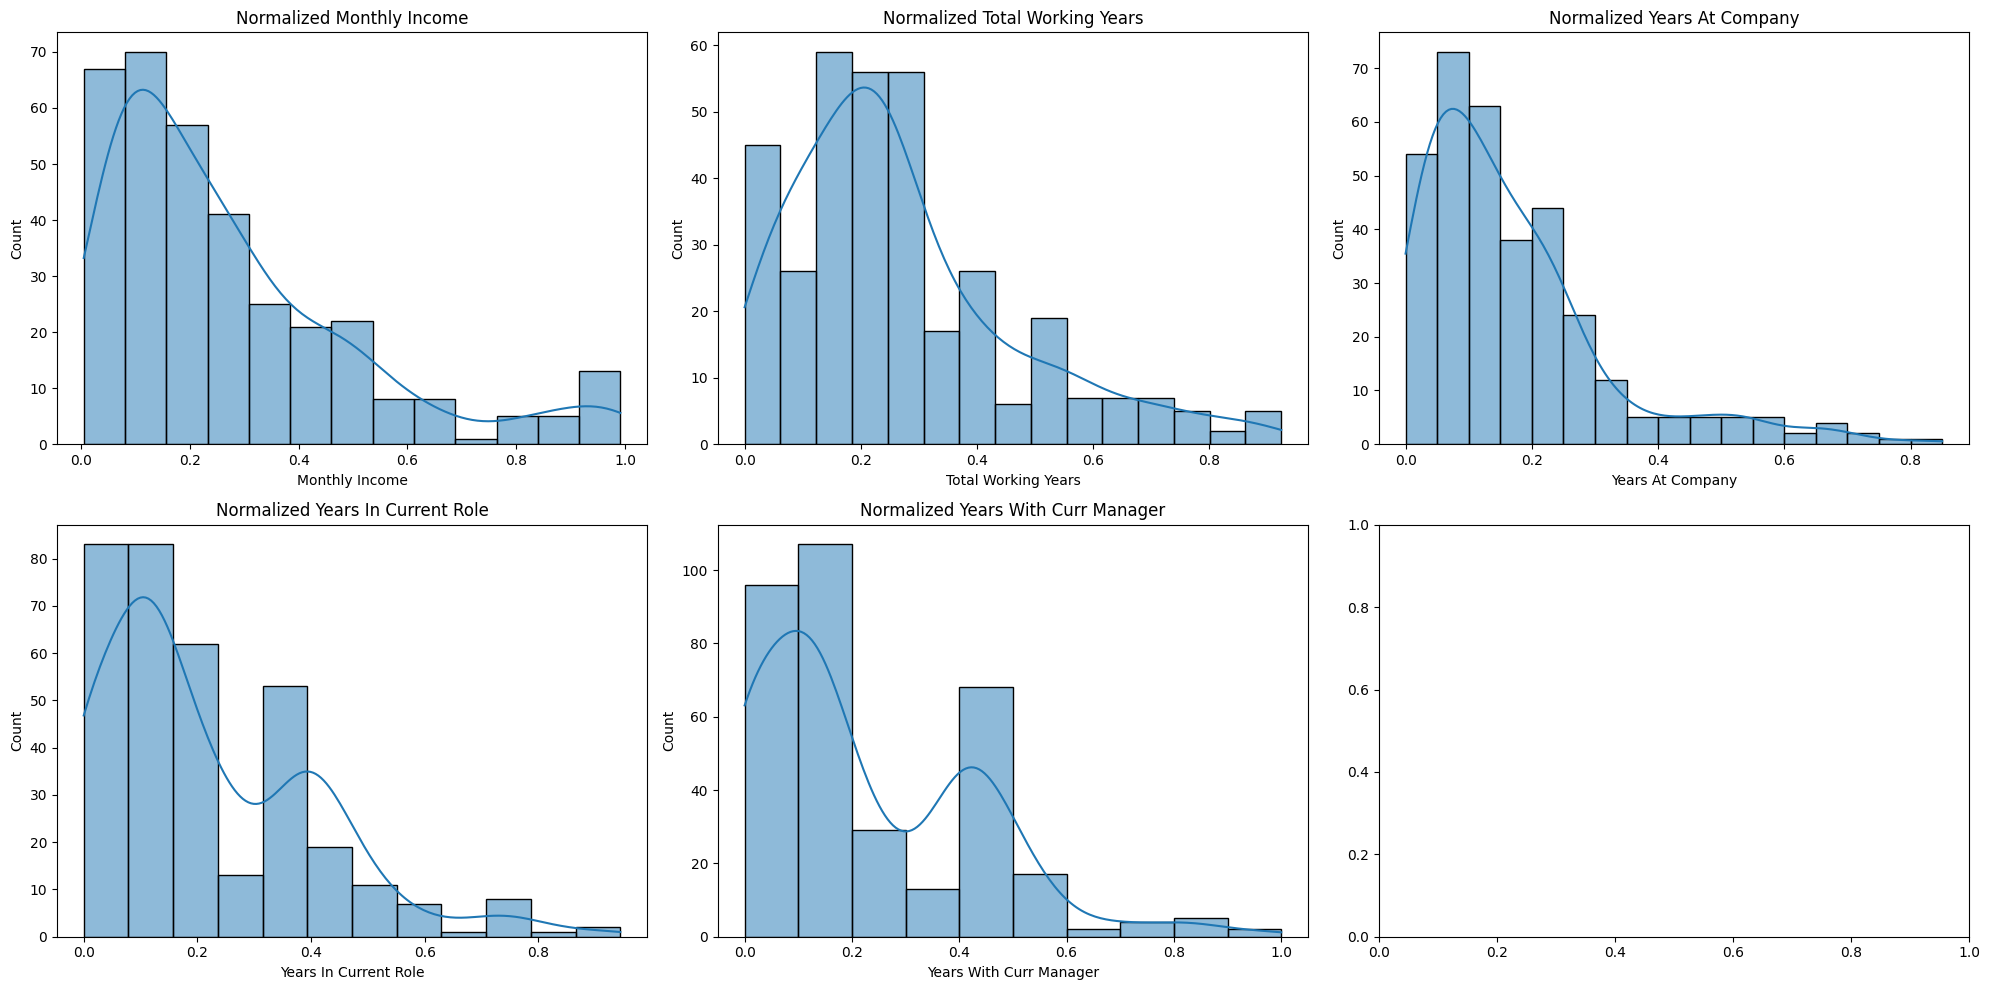

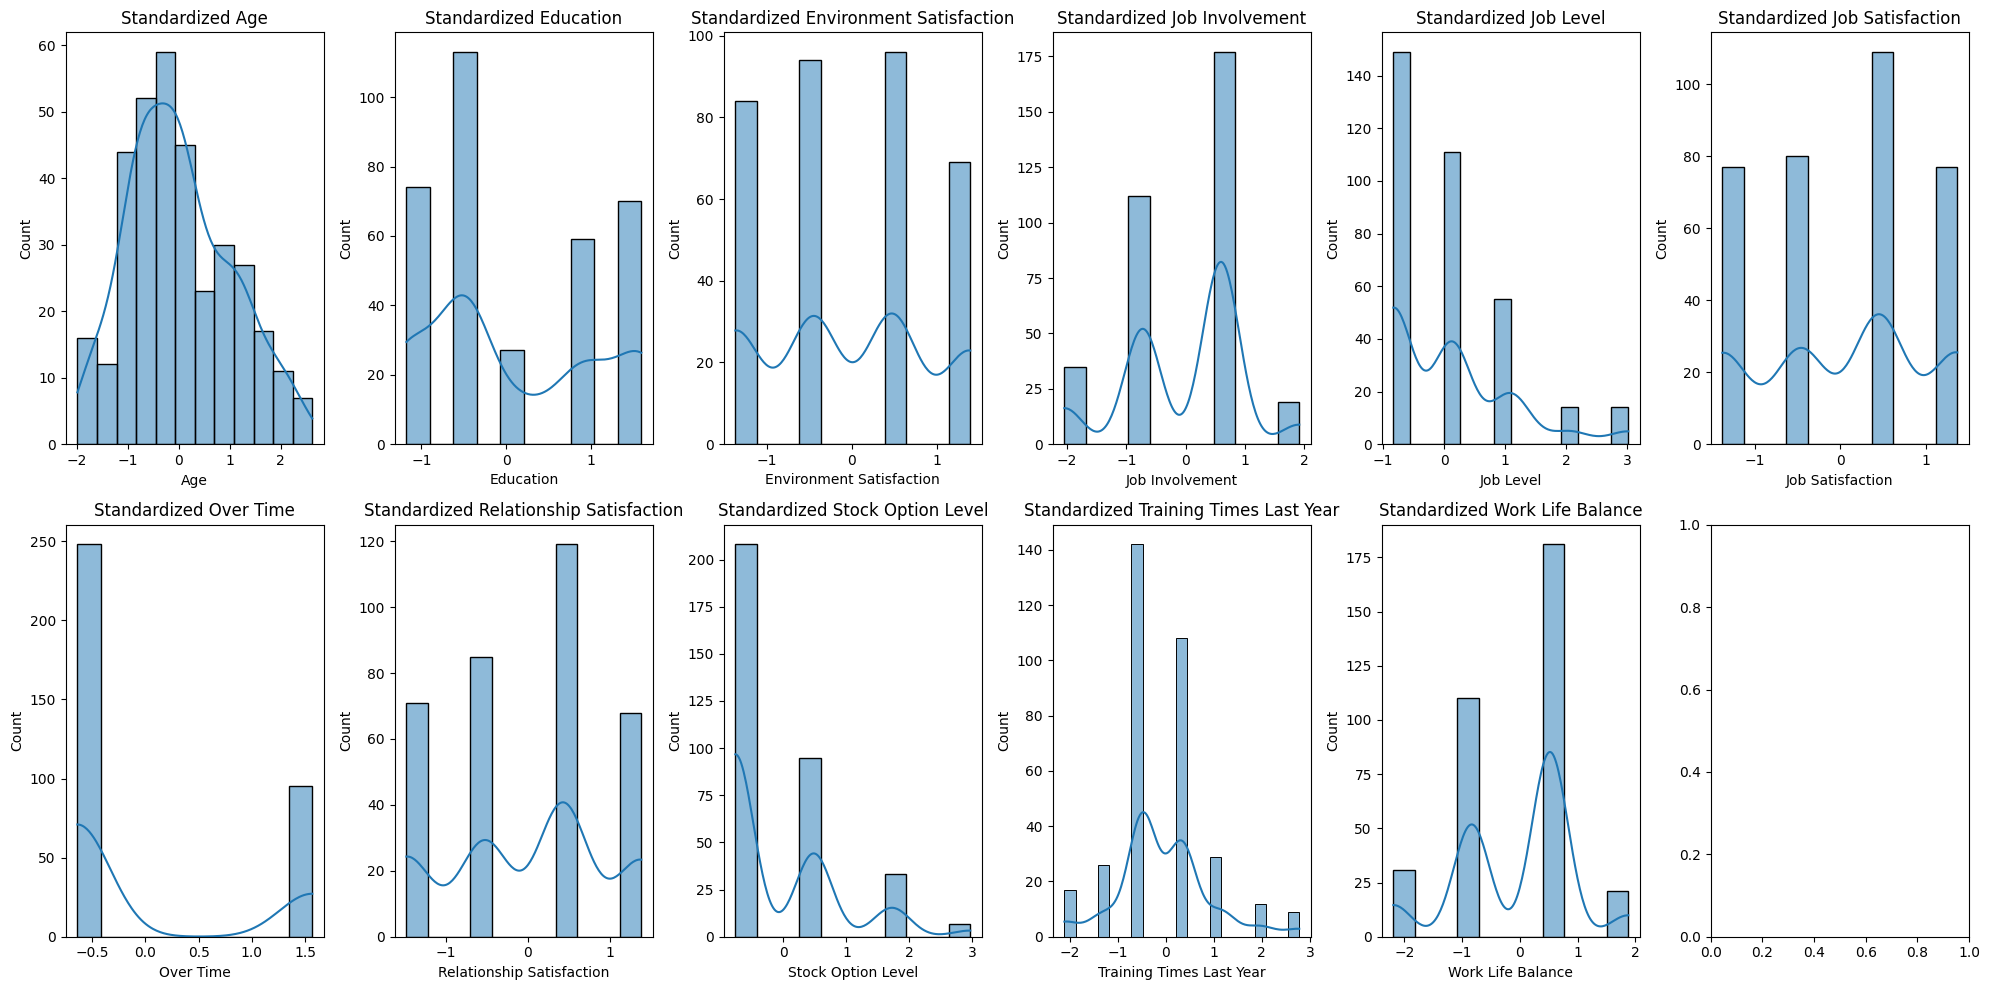

In [ ]:
from math import ceil
import matplotlib.pyplot as plt
import seaborn as sns

# Deklarasi kolom-kolom yang akan di-scaling untuk normalisasi
cols_to_scale_normalize = ['Monthly Income', 'Total Working Years', 'Years At Company', 'Years In Current Role',
                           'Years With Curr Manager']

# Deklarasi kolom-kolom yang akan di-scaling untuk standarisasi
cols_to_scale_standardize = ['Age', 'Education', 'Environment Satisfaction', 'Job Involvement',
                             'Job Level', 'Job Satisfaction', 'Over Time', 'Relationship Satisfaction',
                             'Stock Option Level', 'Training Times Last Year', 'Work Life Balance']

# Visualisasi hasil normalisasi
fig, axs = plt.subplots(2, ceil(len(cols_to_scale_normalize)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale_normalize):
    row = i // ceil(len(cols_to_scale_normalize)/2)
    col_idx = i % ceil(len(cols_to_scale_normalize)/2)
    sns.histplot(x_test[col], kde=True, ax=axs[row, col_idx]).set_title(f'Normalized {col}')

plt.tight_layout()
plt.show()

# Visualisasi hasil standarisasi
fig, axs = plt.subplots(2, ceil(len(cols_to_scale_standardize)/2), figsize=(20,10))

for i, col in enumerate(cols_to_scale_standardize):
    row = i // ceil(len(cols_to_scale_standardize)/2)
    col_idx = i % ceil(len(cols_to_scale_standardize)/2)
    sns.histplot(x_test[col], kde=True, ax=axs[row, col_idx]).set_title(f'Standardized {col}')

plt.tight_layout()
plt.show()

### Feature selection tahap 2 - RFECV

 Fungsi untuk memvisualisasikan F1-Score Curve terhadap jumlah fitur yang dipilih.

In [ ]:
def visualize_f1_curve(selector, selection_method):
    # atur tampilan grafik
    sns.set(style="white", palette="bright", context="notebook")

    # membuat plot
    plt.figure(figsize=(12, 6))
    plt.xlabel("Jumlah fitur yang akan diambil", fontsize=16)
    plt.ylabel("F1 Score", fontsize=16)

    # menggambar plot line
    sns.lineplot(x=list(range(1, len(selector.cv_results_['mean_test_score']) + 1)), y=selector.cv_results_['mean_test_score'], marker='o', linewidth=2.5)
    plt.xticks(range(0, 66, 3), fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(f"Visualisasi {selection_method}", fontsize=18, pad=20)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Fungsi Menampilkan rangking tiap fitur

In [ ]:
def tampilkan_rankings(selector, kolom, method_name):
    # Menampilkan skor maksimum berdasarkan jumlah fitur terpilih
    print('skor dengan %d features: %.5f' % (selector.n_features_, selector.cv_results_['mean_test_score'].max()))
    rankings = selector.ranking_
    features_df = pd.DataFrame(kolom, columns=['nama kolom'])
    rankings_df = pd.DataFrame(rankings, columns=['Ranking dari ' + method_name])
    combined_df = pd.concat([features_df, rankings_df], axis=1)
    combined_df.sort_values('Ranking dari ' + method_name, inplace=True)

    return combined_df

RFECV dengan random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.feature_selection import RFECV, RFE
from sklearn.preprocessing import LabelEncoder

x = x_train
y = y_train

random_forest_clf = RandomForestClassifier(random_state=42, max_depth=15, n_estimators=50, n_jobs=-1)

kf = KFold(n_splits=5, shuffle=True, random_state=42)

rfecv_rf = RFECV(estimator=random_forest_clf, step=1, scoring='f1_micro', n_jobs=-1, verbose=2, cv=kf)
rfecv_rf.fit(x, y)

RFECV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
      estimator=RandomForestClassifier(max_depth=15, n_estimators=50, n_jobs=-1,
                                       random_state=42),
      n_jobs=-1, scoring='f1_micro', verbose=2)

Jumlah fitur yang paling optimal: 17


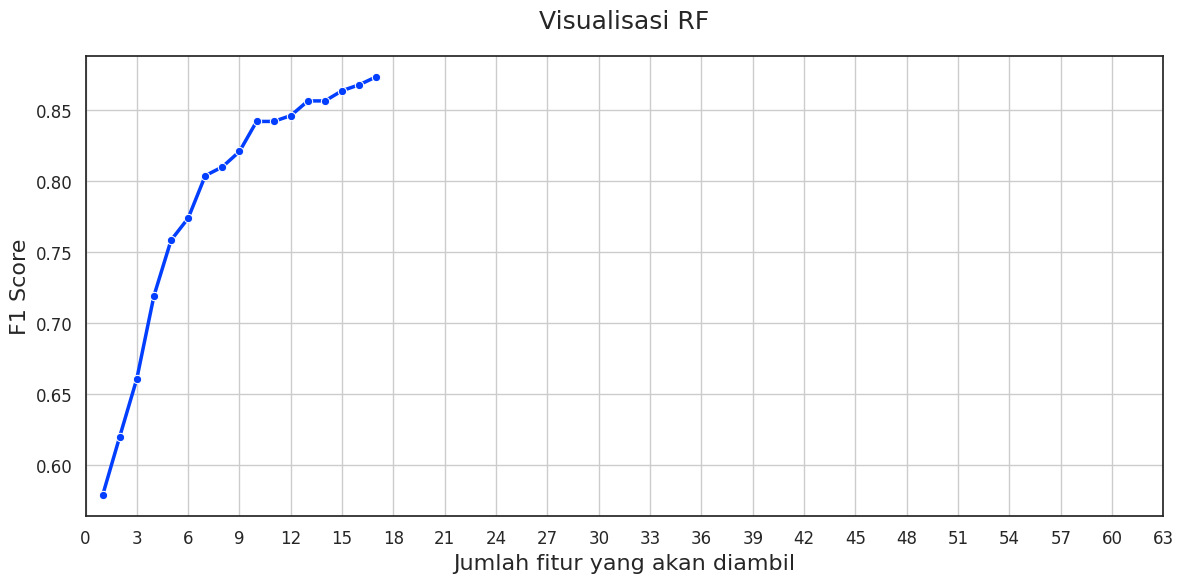

skor dengan 17 features: 0.87359


,nama kolom,Ranking dari RF
0,Gender,1
14,Years At Company,1
13,Work Life Balance,1
12,Total Working Years,1
11,Stock Option Level,1
10,Relationship Satisfaction,1
9,Monthly Income,1
15,Years In Current Role,1
8,Job Satisfaction,1
6,Job Involvement,1


In [ ]:
jumlah_fitur_optimal = rfecv_rf.n_features_

print('Jumlah fitur yang paling optimal:', jumlah_fitur_optimal)
visualize_f1_curve(rfecv_rf, 'RF')
rangking_rfecv_rf_df =  tampilkan_rankings(rfecv_rf, x.columns, 'RF').head(jumlah_fitur_optimal)
rangking_rfecv_rf_df


In [ ]:
train_df = pd.concat([x_train, y_train], axis=1)

In [ ]:
train_df.head()

,Gender,Over Time,Training Times Last Year,Age,Education,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income,Relationship Satisfaction,Stock Option Level,Total Working Years,Work Life Balance,Years At Company,Years In Current Role,Years With Curr Manager,Attrition
1960,0,-0.638285,-0.482047,-0.748686,-1.178343,-0.450805,-0.724841,1.093991,-1.380777,0.421327,-1.481639,-0.763559,0.250,-0.835276,0.200,0.277778,0.411765,1
736,1,-0.638285,0.333142,1.384079,1.599794,0.472725,-0.724841,1.093991,0.450181,0.526066,-0.526728,-0.763559,0.675,0.521610,0.375,0.611111,0.470588,0
564,1,-0.638285,0.333142,1.047326,-1.178343,-0.450805,-2.045088,0.132470,0.450181,0.296103,-1.481639,-0.763559,0.225,0.521610,0.200,0.388889,0.058824,0
230,0,-0.638285,0.333142,1.833082,-0.483809,0.472725,-0.724841,-0.829052,1.365660,0.116008,-0.526728,-0.763559,0.150,-0.835276,0.050,0.111111,0.117647,0
705,1,-0.638285,0.333142,0.373822,0.210726,-1.374335,1.915652,1.093991,0.450181,0.361822,1.383093,-0.763559,0.225,0.521610,0.200,0.388889,0.411765,0


In [ ]:
test_df = pd.concat([x_test, y_test], axis=1)

In [ ]:
# train_df.shape
selected_rfecv = rangking_rfecv_rf_df.iloc[:,0]
selected_rfecv = selected_rfecv.tolist() + ['Attrition']
# print(selected_rfecv)

selected_rfecv_train_df = train_df[selected_rfecv].copy()
selected_rfecv_test_df = test_df[selected_rfecv].copy()

print('data train = ', selected_rfecv_train_df.shape)
print('data test = ', selected_rfecv_test_df.shape)

data train =  (1938, 18)
data test =  (343, 18)


In [ ]:
Train_x = selected_rfecv_train_df.drop('Attrition', axis = 1)
Train_y= selected_rfecv_train_df['Attrition']

Test_x = selected_rfecv_test_df.drop('Attrition', axis = 1)
Test_y= selected_rfecv_test_df['Attrition']

In [ ]:
Train_x = selected_rfecv_train_df.drop('Attrition', axis = 1)
Train_y= selected_rfecv_train_df['Attrition']

Test_x = selected_rfecv_test_df.drop('Attrition', axis = 1)
Test_y= selected_rfecv_test_df['Attrition']

In [ ]:
Train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 1960 to 860
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     1938 non-null   int64  
 1   Years At Company           1938 non-null   float64
 2   Work Life Balance          1938 non-null   float64
 3   Total Working Years        1938 non-null   float64
 4   Stock Option Level         1938 non-null   float64
 5   Relationship Satisfaction  1938 non-null   float64
 6   Monthly Income             1938 non-null   float64
 7   Years In Current Role      1938 non-null   float64
 8   Job Satisfaction           1938 non-null   float64
 9   Job Involvement            1938 non-null   float64
 10  Environment Satisfaction   1938 non-null   float64
 11  Education                  1938 non-null   float64
 12  Age                        1938 non-null   float64
 13  Training Times Last Year   1938 non-null   flo

# Modeling tahap 2

## Modelling sebelum tuning

### Tiga model prediksi terbaik menurut F1 Score

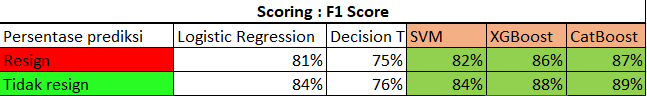

Dari membandingkan hasil prediksi 5 model, ditemukan 3 model terbaik yang sesuai dalam memprediksi karyawan yang akan resign yaitu :

1.   CatBoost = 87%
2.   XGBoost = 86%
3.   SVM = 82%






Untuk menentukan apakah hasil di atas menunjukkan overfitting, kita perlu melihat perbedaan hasil antara data training dan data testing. Overfitting biasanya ditandai dengan skor akurasi yang sangat tinggi pada data training, tetapi rendah pada data testing. Dapat dilihat bahwa ketika divalidasi dengan data test, nilai semua algoritma menjadi lebih baik.

# Kesimpulan

## Top 10 kolom terpenting menurut Optimized_Xgboost

In [ ]:
# Feature Importance for Optimized XGBoost
feature_importance = optimized_xgboost.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]
features = Train_x.columns
top_n = 10

# Membuat DataFrame dari feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features[sorted_idx][:top_n],
    'Importance': feature_importance[sorted_idx][:top_n]
})

feature_importance_df

,Feature,Importance
0,Stock Option Level,0.183587
1,Job Level,0.132333
2,Job Involvement,0.082115
3,Job Satisfaction,0.067716
4,Environment Satisfaction,0.061727
5,Over Time,0.061564
6,Work Life Balance,0.061140
7,Training Times Last Year,0.043963
8,Years With Curr Manager,0.043591
9,Years In Current Role,0.040512


Jadi, jika suatu perusahaan ingin mencegah karyawan untuk resign. Menurut model Xgboost, perusahaan dapat fokus terhadap fitur atau hal-hal yang paling memengaruhi seperti yang tertera di atas.

## Menyimpan model ke pickle

In [ ]:
import pickle

# Simpan model Optimized SVM
with open('optimized_svm_model.pkl', 'wb') as file:
    pickle.dump(optimized_SVM, file)

# Simpan model Optimized XGBoost
with open('optimized_xgboost_model.pkl', 'wb') as file:
    pickle.dump(optimized_xgboost, file)

# Simpan model Optimized CatBoost
with open('optimized_catboost_model.pkl', 'wb') as file:
    pickle.dump(optimized_catboost, file)